<a href="https://colab.research.google.com/github/svetlanama/ai_practice/blob/dev/%D0%94%D0%97_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [140]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/House_Rent_Dataset.csv", index_col="Unnamed: 0")

[Інформація про дані](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset)

In [141]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2.0,10000.0,1100.0,Ground out of 2,NaN,NaN,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2022-05-13,2.0,20000.0,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,NaN
2,2022-05-16,2.0,17000.0,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2022-07-04,2.0,10000.0,800.0,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,NaN,2.0,7500.0,850.0,1 out of 2,Carpet Area,NaN,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


In [144]:
df = df[['Size', 'Furnishing Status', 'City', 'Rent']]
# df = df[['Size', 'Rent']]
df.head()
# df.shape


,Size,Furnishing Status,City,Rent
0,1100.0,Unfurnished,Kolkata,10000.0
1,800.0,Semi-Furnished,Kolkata,20000.0
2,1000.0,Semi-Furnished,Kolkata,17000.0
3,800.0,Unfurnished,Kolkata,10000.0
4,850.0,Unfurnished,Kolkata,7500.0


# Завдання 1
Ввиведіть основні числові характеристики даних, розділіть на тренувальну та тестову чатини. Цільова ознака `Rent`

,Size,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Furnishing Status_nan,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,City_nan
1354,450.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
167,800.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4582,920.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4115,1100.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3741,1200.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3909,1500.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
494,400.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4061,400.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4313,1200.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


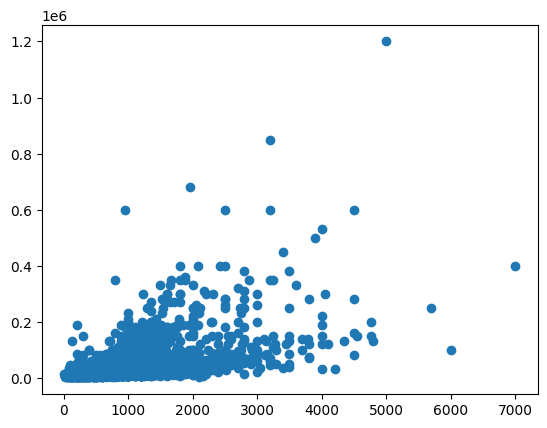

In [145]:
df.describe()

# Display histogram
# ax = df['Rent'].plot(kind='hist',    # diagramm type hist
#                              bins=30,        # column count
#                              figsize=(14,6)  # image size (in inch)
#                              )
# ax.set_ylabel('Rent')
# ax.set_xlabel('other')


# remove_outliers
df=df[df['Rent'] < 1.5e6]
# df['Rent'].plot(kind='box', vert=False, figsize=(14,6))

df=df[df['Size'] < 0.6e6]
# df['Size'].plot(kind='box', vert=False, figsize=(24,6))

df.shape
plt.scatter(df['Size'], df['Rent'])

# Prepare y and X. Divide on train and test set
y = df['Rent']

X = df.drop(columns=['Rent'])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,  # mai part for train data
                                                    random_state=42) # random

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoder.set_output(transform='pandas')
encoder.fit(X_train[['Furnishing Status', 'City']])

X_train_categorical = encoder.transform(X_train[['Furnishing Status', 'City']])
X_train_concat = pd.concat([X_train, X_train_categorical], axis=1)
X_train_concat.drop(columns=['Furnishing Status', 'City'], inplace=True)

X_train_concat


X_test_categorical = encoder.transform(X_test[['Furnishing Status', 'City']])
X_test_concat = pd.concat([X_test, X_test_categorical], axis=1)
X_test_concat.drop(columns=['Furnishing Status', 'City'], inplace=True)

X_test_concat

# Завдання 2
Створіть Pipeline для обробки числових стовпчиків(заповнення пропусків)

In [146]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_transformer = Pipeline(
    steps=[('inpute', SimpleImputer(strategy='median'))]
)


# Завдання 3
Створіть Pipeline для обробки категоріальних стовпчиків(заповнення пропусків та кодування)

In [147]:
cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OneHotEncoder(sparse_output=False))])

# Завдання 4
Об'єднайте попередні Pipeline в один ColumnTransformer

In [148]:
# Build pipeline
# X - persisent data
num_columns = X.select_dtypes(include="number").columns
cat_columns = X.select_dtypes(include="object").columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
        ("cat", cat_transformer, cat_columns),
    ]
)

preprocessor.set_output(transform='pandas')
preprocessor





ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('inpute',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['Size'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 Index(['Furnishing Status', 'City'], dtype='object'))])

# Завдання 5
Створіть остаточну модель та натренуйте її

In [149]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# train
model.fit(X_train_concat, y_train)

LinearRegression()

# Завдання 6
Виведіть основні метрики моделі

In [156]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

all_metrics = pd.DataFrame()


y_train_pred = model.predict(X_train_concat)
all_metrics['train'] = get_metrics(y_train, y_train_pred)

y_test_pred = model.predict(X_test_concat)
all_metrics['test'] = get_metrics(y_test, y_test_pred)


# X_train_concat
all_metrics

# TODO: think about filling empty items using kNN algo, etc....

,train,test
MAE,20250.27,22005.08
RMSE,38138.48,52694.04
R2,0.48,0.47


# Завдання 7
Збережіть модель, завантажте її та спрогнозуйте ціну автомобіля

In [151]:
data = pd.DataFrame({'Size': [900],
                     'Furnishing Status': ['Semi-Furnished'],
                     'City': ['Mumbai']})

data

,Size,Furnishing Status,City
0,900,Semi-Furnished,Mumbai


In [155]:
# SizeFurnishing Status_Furnished	Furnishing Status_Semi-Furnished	Furnishing Status_Unfurnished	Furnishing Status_nan
# City_Bangalore	City_Chennai	City_Delhi	City_Hyderabad	City_Kolkata	City_Mumbai	City_nan
params = [[850.0,	0.0,	1.0,	0.0,	0.0, 1.0,	0.0,	0.0, 	0.0, 	0.0, 	0.0, 	0.0]]

model.predict(params)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13644.0830578])